In [1]:
import json
import os
import pprint
import random as rd

import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity
from torch.utils.data import random_split

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import umap
import plotly.express as px

from sklearn.decomposition import PCA

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from file_manager import combine_pt_files, get_combined_files, sample, split_on_label, cosine_similarity, pre_process, plot_similarity, plot_clusters, cluster, cosine_similarity_for_both_classes, plot_line_graph

/Users/groelisabeth/anaconda3/envs/xai_master/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cwd = os.getcwd()

ids = ['_10', '_20', '_30', '_40', '_50', '_60', '_70', '_80', '_90', '_100']
path = cwd + '/map_open_doors_90_degrees/block_3/visionary-hill-816'

In [3]:
# check if the combined file exists under the path
#if not os.path.isfile(path + '_combined.pt'):
#    combine_pt_files(path, ids)

In [4]:
files = get_combined_files(cwd)

block = files[2]

block_name = block.split("/")[-1].split("_combined")[0]

print('Analyzing:', block_name)

data = torch.load(block, map_location=device)
# sample the data
pos_label, neg_label = pre_process(data)

Analyzing: block_3


/var/folders/0q/xlpf7d8d7txb2299b8bs981r0000gn/T/ipykernel_3225/3381688388.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(block, map_location=device)


Positives (before sampling): 9156
Negatives (before sampling): 3747
Reduced positives to: 3747
Positives (after sampling): 374
Negatives (after sampling): 374


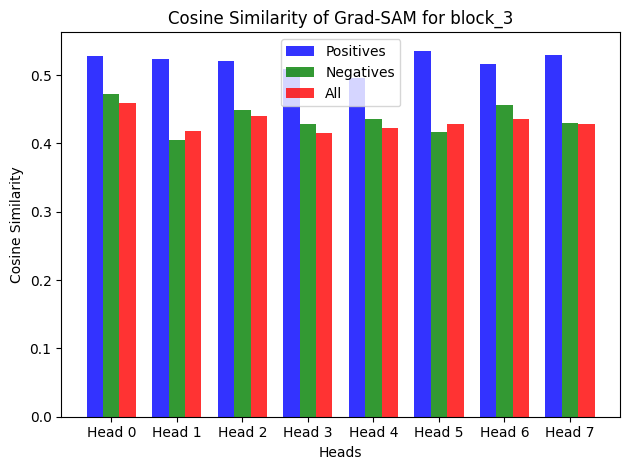

In [5]:
# get the tensors from the samples
pos_sample = [step_data['tensors'] for step_data in pos_label]
neg_sample = [step_data['tensors'] for step_data in neg_label]

block_3_tensors = {
    'pos_tensors': pos_sample,
    'neg_tensors': neg_sample
}

avg_pos_sim = cosine_similarity(block_3_tensors['pos_tensors'])
avg_neg_sim = cosine_similarity(block_3_tensors['neg_tensors'])
avg_all_sim = cosine_similarity_for_both_classes(block_3_tensors['pos_tensors'], block_3_tensors['neg_tensors'])

#print('average positive similarity:', avg_pos_sim)
#print('average negative similarity:', avg_neg_sim)
#print('average all similarity:', avg_all_sim)

plot_similarity(block_name, avg_pos_sim, avg_neg_sim, avg_all_sim)

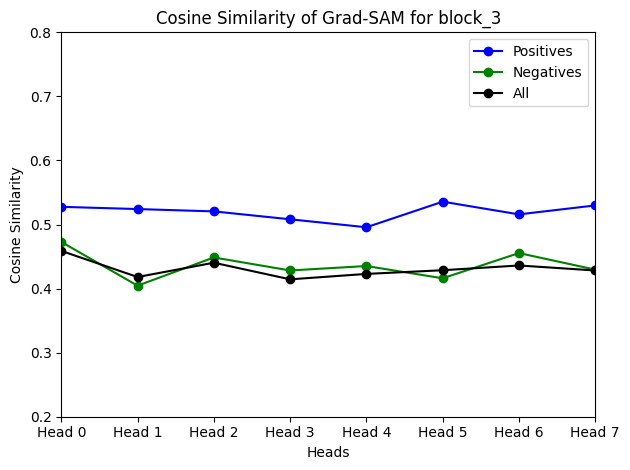

[0.5276281237602234, 0.5241453051567078, 0.5204994082450867, 0.5081804990768433, 0.49571433663368225, 0.5356912612915039, 0.5158458352088928, 0.5298358201980591] [0.47283920645713806, 0.4045562744140625, 0.4485847055912018, 0.42828989028930664, 0.4352351129055023, 0.4160788655281067, 0.4554458558559418, 0.42960017919540405] [0.45884969830513, 0.4180605113506317, 0.4403926432132721, 0.41445186734199524, 0.42290961742401123, 0.4286639988422394, 0.4360697269439697, 0.42827364802360535]


In [6]:
pos, neg, all_ = plot_line_graph(block_name, avg_pos_sim, avg_neg_sim, avg_all_sim)
print(pos, neg, all_)